# Customer Lifetime Value (CLV) Prediction Model

## **1. Import Libraries**

In [1]:
# Customer Lifetime Value (CLV) Prediction Model

## **1. Import Libraries**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

## **2. Load Dataset**


In [2]:
df = pd.read_csv("../data/clv_data.csv")






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     100000 non-null  int64  
 1   Household_Size          100000 non-null  int64  
 2   Location                100000 non-null  object 
 3   Total_Orders            100000 non-null  int64  
 4   Order_Frequency         100000 non-null  float64
 5   Avg_Order_Value         100000 non-null  float64
 6   Total_Revenue           100000 non-null  float64
 7   First_Order_Amount      100000 non-null  float64
 8   Subscription_Length     100000 non-null  int64  
 9   Pauses                  100000 non-null  int64  
 10  Cancellations           100000 non-null  int64  
 11  Email_Open_Rate         100000 non-null  float64
 12  Click_Through_Rate      100000 non-null  float64
 13  Customer_Support_Calls  100000 non-null  int64  
 14  CLV                  

## **3. Exploratory Data Analysis (EDA)**
# Check basic info


In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     100000 non-null  int64  
 1   Household_Size          100000 non-null  int64  
 2   Location                100000 non-null  object 
 3   Total_Orders            100000 non-null  int64  
 4   Order_Frequency         100000 non-null  float64
 5   Avg_Order_Value         100000 non-null  float64
 6   Total_Revenue           100000 non-null  float64
 7   First_Order_Amount      100000 non-null  float64
 8   Subscription_Length     100000 non-null  int64  
 9   Pauses                  100000 non-null  int64  
 10  Cancellations           100000 non-null  int64  
 11  Email_Open_Rate         100000 non-null  float64
 12  Click_Through_Rate      100000 non-null  float64
 13  Customer_Support_Calls  100000 non-null  int64  
 14  CLV                  

# Summary statistics


In [10]:
print(df.describe())



                 Age  Household_Size   Total_Orders  Order_Frequency  \
count  100000.000000   100000.000000  100000.000000    100000.000000   
mean       41.022480        2.999570      24.994460         2.746736   
std        13.526548        1.415609      14.145584         1.299303   
min        18.000000        1.000000       1.000000         0.500040   
25%        29.000000        2.000000      13.000000         1.617893   
50%        41.000000        3.000000      25.000000         2.747429   
75%        53.000000        4.000000      37.000000         3.873576   
max        64.000000        5.000000      49.000000         4.999983   

       Avg_Order_Value  Total_Revenue  First_Order_Amount  \
count    100000.000000  100000.000000       100000.000000   
mean         75.018909    1874.495491           85.055451   
std          25.899906    1294.292238           37.583771   
min          30.000301      30.019470           20.000787   
25%          52.695089     823.450368         

# Visualizing distribution of CLV


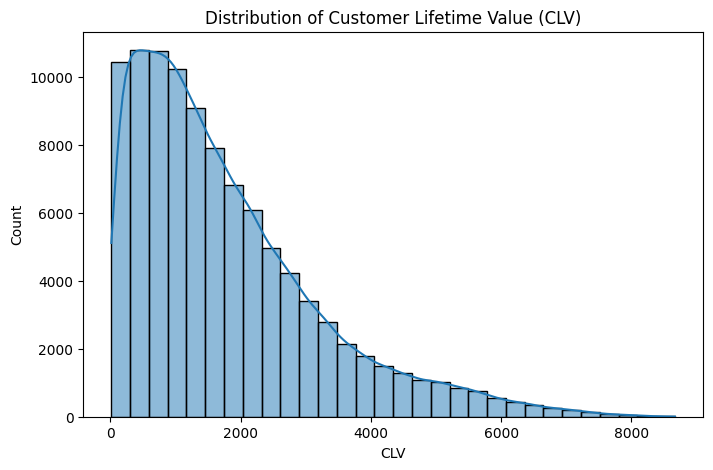

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['CLV'], bins=30, kde=True)
plt.title("Distribution of Customer Lifetime Value (CLV)")
plt.show()



## **4. Feature Selection**


In [5]:
features = [
    "Age", "Household_Size", "Total_Orders", "Order_Frequency", "Avg_Order_Value",
    "Subscription_Length", "Pauses", "Cancellations", "Email_Open_Rate",
    "Click_Through_Rate", "Customer_Support_Calls"
]
X = df[features]
y = df["CLV"]



## **5. Train-Test Split**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## **6. Train Model**


In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

## **7. Model Evaluation**


In [11]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")



MAE: 16.911495284744586
MSE: 700.0438844139164
R2 Score: 0.9996595189553599


## **8. Feature Importance**


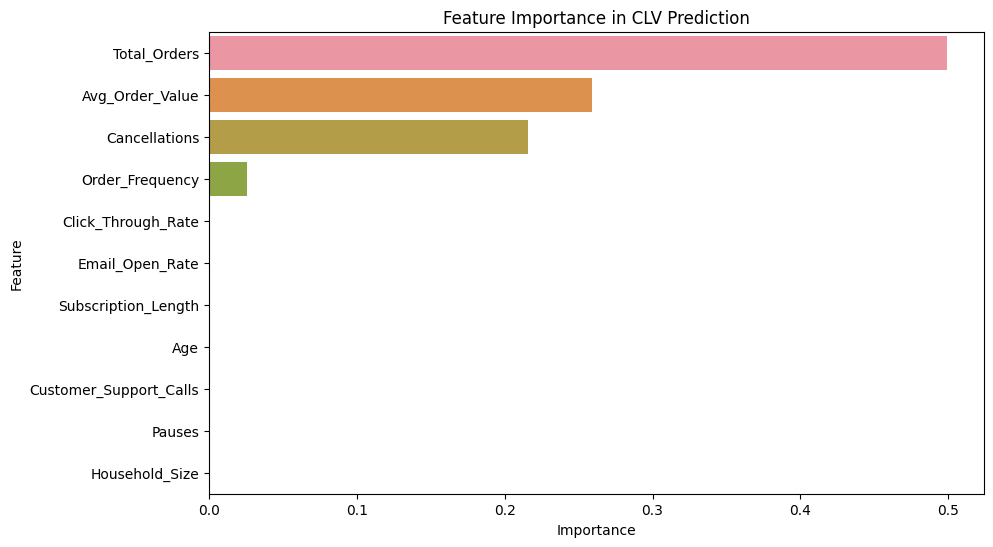

In [12]:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x="Importance", y="Feature")
plt.title("Feature Importance in CLV Prediction")
plt.show()